In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


In [ ]:
for column in df.columns[1:-3]:
  df[column].replace(0,np.NaN,inplace=True)
  df[column].fillna(round(df[column].mean(skipna=True)),inplace=True);

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


In [ ]:
X=df.iloc[:,:8]
Y=df.iloc[:,8:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
scores = []
X_train
Y_train
for i in range(1,13):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,Y_train)

    y_pred = knn.predict(x_test)

    scores.append(accuracy_score(y_test, y_pred))

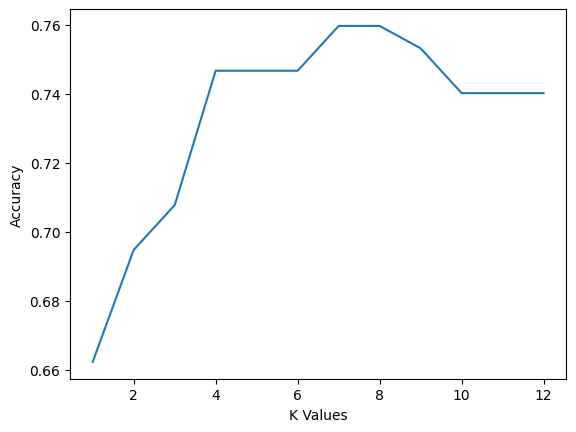

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,13),scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
# knn

In [ ]:
knn.fit(X_train,Y_train)
y_pred = knn.predict(x_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

0.7597402597402597


In [ ]:
print(confusion_matrix(y_pred,y_test))

[[81 19]
 [18 36]]


In [ ]:
print("Error Rate:", 1-accuracy_score(y_pred,y_test))

Error Rate: 0.24025974025974028


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.65      0.67      0.66        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[81 18]
 [19 36]]
Accuracy Score: 0.7597402597402597
Recall Score: 0.6545454545454545
Precision Score: 0.6666666666666666


In [ ]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN) verall correctness of a model's predictions.
# Precision = TP / (TP + FP) accuracy of positive predictions.
# Recall = TP / (TP + FN) measures the ability of a model to identify all positive instances.
# Error Rate = (FP + FN) / (TP + TN + FP + FN)
